<a href="https://colab.research.google.com/github/kyuwoncho/EDA/blob/main/NAVER_API_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naver API

## 1. 네이버 API 사용등록

- 네이버 개발자 센터
- https://developers.naver.com/main/
- Application
    - 어플리케이션 등록
    - 어플리케이션 이름 EDA
    - 사용 API
        - 검색
        - 데이터랩(검색어트랜드)
        - 데이터랩(쇼핑인사이트)
    - 환경추가
        - WEB 설정
        - http://localhost
    - Clienct ID : WUyjcDpO9GnIR_W4rwlJ
    - Clienct Secret : RHOTnh1UPC

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 네이버 검색 API 사용하기
    - https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8 #개발가이드

- urlib : http 프로토콜에 ㄸ라서 서버의 요청/응답을 처리하기 위한 모듈
- urlib.request : 클라이언트의 요청을 처리하는 모듈
- urlib.parse : url 주소에 대한 분석

In [1]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "WUyjcDpO9GnIR_W4rwlJ"
client_secret = "RHOTnh1UPC"

encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Tue, 09 Aug 2022 19:48:37 +0900",
	"total":348387,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b>자격증 입문자 취업준비의 좋은선택",
			"link":"https:\/\/blog.naver.com\/dambi85?Redirect=Log&logNo=222811274814",
			"description":"어떻게든 되겠지 하는 마음으로 우선은 <b>파이썬<\/b>자격증을 취득해 보기로 했는데요. 빅데이터에서 기초가 되는 부분이 <b>파이썬<\/b>이었기 때문에 우선적으로 한 번 배워보고 가능하면 자격증까지 취득하면 좋으니... ",
			"bloggername":"마마 리사킴의 유쾌한 일상 이야기",
			"bloggerlink":"https:\/\/blog.naver.com\/dambi85",
			"postdate":"20220714"
		},
		{
			"title":"<b>파이썬<\/b> 자격증 확실한 취득방법",
			"link":"https:\/\/blog.naver.com\/monoblue01?Redirect=Log&logNo=222818937808",
			"description":"바로 <b>파이썬<\/b> 자격증입니다. 이유는 요즘 가장 흔하게 쓰이는 언어였고, 취업 시 있으면 도움되기 때문이었죠. AI와 빅데이터가 갑자기 인기가 많아지고 관심을 받으면서 자연스럽게 기초 코딩인 <b>파이썬<\/b> 또한... ",
			"bloggername":"루윙코치 교육정보&육아일상",
			"bloggerlink":"https:\/\/blog.naver.com\/monoblue01",
			"postdate":"20220719"
		},
		{
			"title":"<b>파이썬<\/b>교육 기초부터 실무 연습까지",
			"link":"https:\/\/blog.naver.com\/kmisun8282?Re

In [2]:
response

In [3]:
response.getcode() #200이면 정상

200

In [4]:
#다 같은거임
response, response.getcode(), response.code, response.status

(<http.client.HTTPResponse at 0x7fb303395bd0>, 200, 200, 200)

In [5]:
# 글자로 읽을 경우, decode utf-8로 설정
response_body

b'{\n\t"lastBuildDate":"Tue, 09 Aug 2022 19:48:37 +0900",\n\t"total":348387,\n\t"start":1,\n\t"display":10,\n\t"items":[\n\t\t{\n\t\t\t"title":"<b>\xed\x8c\x8c\xec\x9d\xb4\xec\x8d\xac<\\/b>\xec\x9e\x90\xea\xb2\xa9\xec\xa6\x9d \xec\x9e\x85\xeb\xac\xb8\xec\x9e\x90 \xec\xb7\xa8\xec\x97\x85\xec\xa4\x80\xeb\xb9\x84\xec\x9d\x98 \xec\xa2\x8b\xec\x9d\x80\xec\x84\xa0\xed\x83\x9d",\n\t\t\t"link":"https:\\/\\/blog.naver.com\\/dambi85?Redirect=Log&logNo=222811274814",\n\t\t\t"description":"\xec\x96\xb4\xeb\x96\xbb\xea\xb2\x8c\xeb\x93\xa0 \xeb\x90\x98\xea\xb2\xa0\xec\xa7\x80 \xed\x95\x98\xeb\x8a\x94 \xeb\xa7\x88\xec\x9d\x8c\xec\x9c\xbc\xeb\xa1\x9c \xec\x9a\xb0\xec\x84\xa0\xec\x9d\x80 <b>\xed\x8c\x8c\xec\x9d\xb4\xec\x8d\xac<\\/b>\xec\x9e\x90\xea\xb2\xa9\xec\xa6\x9d\xec\x9d\x84 \xec\xb7\xa8\xeb\x93\x9d\xed\x95\xb4 \xeb\xb3\xb4\xea\xb8\xb0\xeb\xa1\x9c \xed\x96\x88\xeb\x8a\x94\xeb\x8d\xb0\xec\x9a\x94. \xeb\xb9\x85\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xec\x97\x90\xec\x84\x9c \xea\xb8\xb0\xec\xb4\x88\xea\

In [6]:
# 글자로 읽을 경우, decode utf-8로 설정
print(response_body.decode('utf-8'))

{
	"lastBuildDate":"Tue, 09 Aug 2022 19:48:37 +0900",
	"total":348387,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b>자격증 입문자 취업준비의 좋은선택",
			"link":"https:\/\/blog.naver.com\/dambi85?Redirect=Log&logNo=222811274814",
			"description":"어떻게든 되겠지 하는 마음으로 우선은 <b>파이썬<\/b>자격증을 취득해 보기로 했는데요. 빅데이터에서 기초가 되는 부분이 <b>파이썬<\/b>이었기 때문에 우선적으로 한 번 배워보고 가능하면 자격증까지 취득하면 좋으니... ",
			"bloggername":"마마 리사킴의 유쾌한 일상 이야기",
			"bloggerlink":"https:\/\/blog.naver.com\/dambi85",
			"postdate":"20220714"
		},
		{
			"title":"<b>파이썬<\/b> 자격증 확실한 취득방법",
			"link":"https:\/\/blog.naver.com\/monoblue01?Redirect=Log&logNo=222818937808",
			"description":"바로 <b>파이썬<\/b> 자격증입니다. 이유는 요즘 가장 흔하게 쓰이는 언어였고, 취업 시 있으면 도움되기 때문이었죠. AI와 빅데이터가 갑자기 인기가 많아지고 관심을 받으면서 자연스럽게 기초 코딩인 <b>파이썬<\/b> 또한... ",
			"bloggername":"루윙코치 교육정보&육아일상",
			"bloggerlink":"https:\/\/blog.naver.com\/monoblue01",
			"postdate":"20220719"
		},
		{
			"title":"<b>파이썬<\/b>교육 기초부터 실무 연습까지",
			"link":"https:\/\/blog.naver.com\/kmisun8282?Re

## 검색 : 책(book)

In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "WUyjcDpO9GnIR_W4rwlJ"
client_secret = "RHOTnh1UPC"

encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/book?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 03 Aug 2022 18:54:59 +0900",
	"total":756,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"파이썬 자동화 교과서 (업무 생산성을 3배 높이는 엑셀, 워드, 크롤링, 메일 자동화 기술)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/33275494626",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3327549\/33275494626.20220716093824.jpg",
			"author":"구지라 히코즈쿠에",
			"discount":"24300",
			"publisher":"제이펍",
			"pubdate":"20220719",
			"isbn":"9791192469195",
			"description":"매일 지루하게 반복되는 작업, 이제 안녕 \n정시 퇴근과 연봉 인상을 보장하는 파이썬 업무 자동화 기술\n\n사람이 종일 작업할 반복 업무를 프로그래밍을 이용하면 2시간 만에 끝낼 수 있다. 파이썬은 누구나 입문할 수 있는 프로그래밍 언어로, 이 책은 엑셀 데이터 처리 등 일상적인 업무를 파이썬으로 자동화하는 방법을 설명한다. 엑셀 파일 읽고 쓰기, 워드\/PDF 저장 등 오피스 문서 자동화로 시작해서, 나아가 웹 브라우저에서 데이터 가져오기, 메일 전송, SNS 게시, 마우스\/키보드 조작까지, 일과 삶을 편리하게 해주는 자동화 지식을 담았다. \n\n1장은 파이썬을 설치하고 간단한 코드를 돌려본다. 2장에서는 openpyxl 등으로 엑셀 파일을 열고 데이터를 읽고 쓰는 법, 그리고 셀 서식에 대해서 배운다. 3장은 좀 더 비즈니스 친화적인 내용으로 템플릿 양식 활용, 복수 파일 취합, 그리고 워드(python-docx)나 CSV와 엑셀을 연계하는 방법 등을 살펴본다. \n\n모든 것이 웹으로 이루

## 검색 : 영화(movie)

In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "WUyjcDpO9GnIR_W4rwlJ"
client_secret = "RHOTnh1UPC"

encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/movie?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 03 Aug 2022 18:56:17 +0900",
	"total":1,
	"start":1,
	"display":1,
	"items":[
		{
			"title":"<b>파이썬<\/b> 앤 가드",
			"link":"https:\/\/movie.naver.com\/movie\/bi\/mi\/basic.nhn?code=152070",
			"image":"https:\/\/ssl.pstatic.net\/imgmovie\/mdi\/mit110\/1520\/152070_P01_145336.jpg",
			"subtitle":"PYTHON AND GUARD",
			"pubDate":"2015",
			"director":"안톤 디아코프|",
			"actor":"",
			"userRating":"0.00"
		}
	]
}


## 검색 : 카페(cafearticle)

In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "WUyjcDpO9GnIR_W4rwlJ"
client_secret = "RHOTnh1UPC"

encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/cafearticle?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 03 Aug 2022 18:56:33 +0900",
	"total":144454,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b> 중고책",
			"link":"http:\/\/cafe.naver.com\/joonggonara\/933333246",
			"description":"개인거래(판매), 판매중, 가격 12,345원, 직접결제(네이버페이 송금), <b>파이썬<\/b> 중고책, 순번 제목 작가 출판사 등급 금액 1 <b>파이썬<\/b> 코딩도장 남재윤 길벗 B 9,000 2 처음 시작하는 <b>파이썬<\/b>(구판) 빌 루바노빅 한빛미디어 S... ",
			"cafename":"중고나라",
			"cafeurl":"https:\/\/cafe.naver.com\/joonggonara"
		},
		{
			"title":"R로 시작하든 <b>파이썬<\/b>으로 시작하든 문제 없는 이유",
			"link":"http:\/\/cafe.naver.com\/sqlpd\/37043",
			"description":"<b>파이썬<\/b> 판다스의 문법 R의 기본함수 문법으로 번역해 보면 간단합니다. -<b>파이썬<\/b>: R df['a'] : d$a df.iloc[a:b,:] : d[a:b, ] df.iloc[d['a']&gt;3,:] : d[d$a&gt;3, ] 등등.. <b>파이썬<\/b>의 판다스는 R의 기본 함수에 매칭된다고 볼 수... ",
			"cafename":"데이터 전문가 포럼 (빅데이터분석기사...",
			"cafeurl":"https:\/\/cafe.naver.com\/sqlpd"
		},
		{
			"title":"vscode <b>파이썬<\/b> 질문입니다!!",
			"link":"http:\/\/cafe.naver.com\/inmacbook\/2554123",
			"description":"vscode에서 <b

## 검색 : 쇼핑(shop)

In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "WUyjcDpO9GnIR_W4rwlJ"
client_secret = "RHOTnh1UPC"

encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/shop?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 03 Aug 2022 18:56:43 +0900",
	"total":202990,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"국내제작 미니 반달 투웨이 숄더 크로스 호보백",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=22883016920",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_2288301\/22883016920.20200517143913.jpg",
			"lprice":"16900",
			"hprice":"",
			"mallName":"네이버",
			"productId":"22883016920",
			"productType":"1",
			"brand":"",
			"maker":"",
			"category1":"패션잡화",
			"category2":"여성가방",
			"category3":"크로스백",
			"category4":""
		},
		{
			"title":"잘모이 셀리나 리얼 <b>파이톤<\/b> 빅 토트백 LTZ-5216",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=29022581772",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_2902258\/29022581772.20210929033957.jpg",
			"lprice":"157990",
			"hprice":"",
			"mallName":"네이버",
			"productId":"29022581772",
			"productType":"1",
			"brand":"잘모이",
			"maker":"",
			"category1":"패션잡화",
			"category2":"여성가방",
			"category3":"토트백",
			"c

## 검색 : 백과사전(encyc)

In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "WUyjcDpO9GnIR_W4rwlJ"
client_secret = "RHOTnh1UPC"

encText = urllib.parse.quote("파이썬")
url = "https://openapi.naver.com/v1/search/encyc?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 03 Aug 2022 18:57:30 +0900",
	"total":481,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.naver?docId=3580815&cid=59088&categoryId=59096",
			"description":"‘<b>파이썬<\/b>’이다. 간결한 문법으로 입문자가 이해하기 쉽고, 다양한 분야에 활용할 수 있기 때문이다. 이 외에도 <b>파이썬<\/b>은 머신러닝, 그래픽, 웹 개발 등 여러 업계에서 선호하는 언어로 꾸준히... ",
			"thumbnail":"http:\/\/openapi-dbscthumb.phinf.naver.net\/4749_000_1\/20170118193349632_0CHSSS5Y6.png\/01_16.png?type=m160_160"
		},
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.naver?docId=3607513&cid=58598&categoryId=59316",
			"description":" 컴퓨터 언어의 일종으로 간결하고 생산성 높은 프로그래밍 언어.  <b>파이썬<\/b>(python)은 프로그램을 설계하는 프로그래밍 언어 중 하나입니다. 컴퓨터는 0과 1을(이진수) 인식하여 작동하기 때문에 과거에는... ",
			"thumbnail":"http:\/\/openapi-dbscthumb.phinf.naver.net\/4751_000_3\/20170710213206672_OPHLG2VOW.jpg\/992_170575_10034.jpg?type=m160_160"
		},
		{
			"title":"<b>파이썬<\/b>",
			"link":"https:\/\/terms.naver.com\/entry.na

# 실습

## 몰스킨

In [1]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "WUyjcDpO9GnIR_W4rwlJ"
client_secret = "RHOTnh1UPC"

encText = urllib.parse.quote("몰스킨")
url = "https://openapi.naver.com/v1/search/shop?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Tue, 09 Aug 2022 21:22:26 +0900",
	"total":24408,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>몰스킨<\/b> 클래식 노트 소프트커버 도트 포켓 머틀그린",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=24014924801",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_2401492\/24014924801.20200903021703.jpg",
			"lprice":"20760",
			"hprice":"",
			"mallName":"네이버",
			"productId":"24014924801",
			"productType":"1",
			"brand":"몰스킨",
			"maker":"몰스킨",
			"category1":"생활\/건강",
			"category2":"문구\/사무용품",
			"category3":"노트\/수첩",
			"category4":"노트"
		},
		{
			"title":"<b>몰스킨<\/b> 클래식노트 익스팬디드 소프트커버 사파이어블루",
			"link":"https:\/\/search.shopping.naver.com\/gate.nhn?id=26369214932",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_2636921\/26369214932.20210315185812.jpg",
			"lprice":"19410",
			"hprice":"",
			"mallName":"네이버",
			"productId":"26369214932",
			"productType":"1",
			"brand":"몰스킨",
			"maker":"몰스킨",
			"category1":"생활\/건강",
			"category2":"문구\/사무

### gen_search_url()

encText = urllib.parse.quote("몰스킨")


url = "https://openapi.naver.com/v1/search/shop?query=" + encText # json 결과

In [2]:
def gen_search_url(api_node, search_text,start_num,disp_num):
  base = url = "https://openapi.naver.com/v1/search"
  node = "/" + api_node + ".json"
  param_query = "?query=" + urllib.parse.quote(search_text)
  param_start = "&start=" + str(start_num)
  param_disp = "&display" + str(disp_num)

  return base + node + param_query + param_start + param_disp

In [3]:
gen_search_url("shop","TEST",10,3)

'https://openapi.naver.com/v1/search/shop.json?query=TEST&start=10&display3'

### get_result_onepage()

In [4]:
import json
import datetime

def get_result_onpage(url):
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  response = urllib.request.urlopen(request)
  print("[%s] Url Request Success" % datetime.datetime.now())
  return json.loads(response.read().decode("utf-8"))

In [5]:
datetime.datetime.now() #현재시간

datetime.datetime(2022, 8, 9, 12, 22, 30, 373233)

In [6]:
#1 = 첫번째 페이지 부터 시작
# 5 = 5개 보여줘
url = gen_search_url("shop","몰스킨",1,5) 
one_result = get_result_onpage(url)

[2022-08-09 12:22:31.321180] Url Request Success


In [7]:
one_result

{'display': 10,
 'items': [{'brand': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   'category4': '노트',
   'hprice': '',
   'image': 'https://shopping-phinf.pstatic.net/main_2401492/24014924801.20200903021703.jpg',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=24014924801',
   'lprice': '20760',
   'maker': '몰스킨',
   'mallName': '네이버',
   'productId': '24014924801',
   'productType': '1',
   'title': '<b>몰스킨</b> 클래식 노트 소프트커버 도트 포켓 머틀그린'},
  {'brand': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   'category4': '노트',
   'hprice': '',
   'image': 'https://shopping-phinf.pstatic.net/main_2636921/26369214932.20210315185812.jpg',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=26369214932',
   'lprice': '19410',
   'maker': '몰스킨',
   'mallName': '네이버',
   'productId': '26369214932',
   'productType': '1',
   'title': '<b>몰스킨</b> 클래식노트 익스팬디드 소프트커버 사파이어블루'},
  {'brand': '몰스킨',
   'category1': '

In [8]:
one_result["items"] #list형태

[{'brand': '몰스킨',
  'category1': '생활/건강',
  'category2': '문구/사무용품',
  'category3': '노트/수첩',
  'category4': '노트',
  'hprice': '',
  'image': 'https://shopping-phinf.pstatic.net/main_2401492/24014924801.20200903021703.jpg',
  'link': 'https://search.shopping.naver.com/gate.nhn?id=24014924801',
  'lprice': '20760',
  'maker': '몰스킨',
  'mallName': '네이버',
  'productId': '24014924801',
  'productType': '1',
  'title': '<b>몰스킨</b> 클래식 노트 소프트커버 도트 포켓 머틀그린'},
 {'brand': '몰스킨',
  'category1': '생활/건강',
  'category2': '문구/사무용품',
  'category3': '노트/수첩',
  'category4': '노트',
  'hprice': '',
  'image': 'https://shopping-phinf.pstatic.net/main_2636921/26369214932.20210315185812.jpg',
  'link': 'https://search.shopping.naver.com/gate.nhn?id=26369214932',
  'lprice': '19410',
  'maker': '몰스킨',
  'mallName': '네이버',
  'productId': '26369214932',
  'productType': '1',
  'title': '<b>몰스킨</b> 클래식노트 익스팬디드 소프트커버 사파이어블루'},
 {'brand': '몰스킨',
  'category1': '생활/건강',
  'category2': '문구/사무용품',
  'category3': '다이어리/

In [9]:
#하나의 딕셔너리 key value key value 가 나옴
one_result["items"][0]["title"]

'<b>몰스킨</b> 클래식 노트 소프트커버 도트 포켓 머틀그린'

In [10]:
one_result["items"][0]["link"]

'https://search.shopping.naver.com/gate.nhn?id=24014924801'

In [11]:
one_result["items"][0]["lprice"]

'20760'

In [12]:
one_result["items"][0]["mallName"]

'네이버'

### get_fields()

In [13]:
one_result

{'display': 10,
 'items': [{'brand': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   'category4': '노트',
   'hprice': '',
   'image': 'https://shopping-phinf.pstatic.net/main_2401492/24014924801.20200903021703.jpg',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=24014924801',
   'lprice': '20760',
   'maker': '몰스킨',
   'mallName': '네이버',
   'productId': '24014924801',
   'productType': '1',
   'title': '<b>몰스킨</b> 클래식 노트 소프트커버 도트 포켓 머틀그린'},
  {'brand': '몰스킨',
   'category1': '생활/건강',
   'category2': '문구/사무용품',
   'category3': '노트/수첩',
   'category4': '노트',
   'hprice': '',
   'image': 'https://shopping-phinf.pstatic.net/main_2636921/26369214932.20210315185812.jpg',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=26369214932',
   'lprice': '19410',
   'maker': '몰스킨',
   'mallName': '네이버',
   'productId': '26369214932',
   'productType': '1',
   'title': '<b>몰스킨</b> 클래식노트 익스팬디드 소프트커버 사파이어블루'},
  {'brand': '몰스킨',
   'category1': '

In [14]:
import pandas as pd

def get_fields(json_data):
  title = [each["title"] for each in json_data["items"]]
  link = [each["link"] for each in json_data["items"]]
  lprice = [each["lprice"] for each in json_data["items"]]
  mall_name = [each["mallName"] for each in json_data["items"]]

  result_pd = pd.DataFrame({
      "title" : title,
      "link" : link,
      "lprice" : lprice,
      "mall" : mall_name,
  },columns = ["title","lprice","link","mall"])
  return result_pd

In [15]:
get_fields(one_result)

,title,lprice,link,mall
0,<b>몰스킨</b> 클래식 노트 소프트커버 도트 포켓 머틀그린,20760,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,<b>몰스킨</b> 클래식노트 익스팬디드 소프트커버 사파이어블루,19410,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,<b>몰스킨</b> 2023 위클리 18개월 다이어리 소프트커버 포켓 색상선택,28000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,<b>몰스킨</b> 다이어리 수첩 데일리 위클리 파인그린 레몬옐로우 룰드,9300,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,<b>몰스킨</b> 노트 가죽 하드커버 각인 감성 고급 명품 업무용 이쁜 심플,24900,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
5,"[<b>몰스킨</b>] 2022-23년 18개월 다이어리(데일리, 위클리, 먼슬리,...",28000,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
6,<b>몰스킨</b> 클래식 노트 소프트커버 룰드 라지 리프블루,19650,https://search.shopping.naver.com/gate.nhn?id=...,네이버
7,<b>몰스킨</b> 2023 위클리 18개월 다이어리 소프트커버 라지 색상선택,39000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
8,<b>몰스킨</b> 무료각인 룰드 노트 하드 포켓 -머틀그린,18850,https://search.shopping.naver.com/gate.nhn?id=...,네이버
9,<b>몰스킨</b> 클래식노트 플레인 하드 L,19440,https://search.shopping.naver.com/gate.nhn?id=...,네이버


### delete_tag()

In [16]:
def delete_tag(input_str):
  input_str = input_str.replace("<b>","'")
  input_str = input_str.replace("</b>","'")
  return input_str

In [17]:
import pandas as pd

def get_fields(json_data):
  title = [delete_tag(each["title"]) for each in json_data["items"]]
  link = [each["link"] for each in json_data["items"]]
  lprice = [each["lprice"] for each in json_data["items"]]
  mall_name = [each["mallName"] for each in json_data["items"]]

  result_pd = pd.DataFrame({
      "title" : title,
      "link" : link,
      "lprice" : lprice,
      "mall" : mall_name,
  },columns = ["title","lprice","link","mall"])
  return result_pd

In [18]:
get_fields(one_result)

,title,lprice,link,mall
0,'몰스킨' 클래식 노트 소프트커버 도트 포켓 머틀그린,20760,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,'몰스킨' 클래식노트 익스팬디드 소프트커버 사파이어블루,19410,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,'몰스킨' 2023 위클리 18개월 다이어리 소프트커버 포켓 색상선택,28000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,'몰스킨' 다이어리 수첩 데일리 위클리 파인그린 레몬옐로우 룰드,9300,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,'몰스킨' 노트 가죽 하드커버 각인 감성 고급 명품 업무용 이쁜 심플,24900,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
5,"['몰스킨'] 2022-23년 18개월 다이어리(데일리, 위클리, 먼슬리, 한정판)",28000,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
6,'몰스킨' 클래식 노트 소프트커버 룰드 라지 리프블루,19650,https://search.shopping.naver.com/gate.nhn?id=...,네이버
7,'몰스킨' 2023 위클리 18개월 다이어리 소프트커버 라지 색상선택,39000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
8,'몰스킨' 무료각인 룰드 노트 하드 포켓 -머틀그린,18850,https://search.shopping.naver.com/gate.nhn?id=...,네이버
9,'몰스킨' 클래식노트 플레인 하드 L,19440,https://search.shopping.naver.com/gate.nhn?id=...,네이버


In [19]:
url = gen_search_url("shop", "몰스킨",1,5)
json_result = get_result_onpage(url)
pd_result = get_fields(json_result)

[2022-08-09 12:22:39.855251] Url Request Success


In [20]:
pd_result

,title,lprice,link,mall
0,'몰스킨' 클래식 노트 소프트커버 도트 포켓 머틀그린,20760,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,'몰스킨' 클래식노트 익스팬디드 소프트커버 사파이어블루,19410,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,'몰스킨' 2023 위클리 18개월 다이어리 소프트커버 포켓 색상선택,28000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,'몰스킨' 다이어리 수첩 데일리 위클리 파인그린 레몬옐로우 룰드,9300,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,'몰스킨' 노트 가죽 하드커버 각인 감성 고급 명품 업무용 이쁜 심플,24900,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
5,"['몰스킨'] 2022-23년 18개월 다이어리(데일리, 위클리, 먼슬리, 한정판)",28000,https://search.shopping.naver.com/gate.nhn?id=...,몰스킨공식온라인스토어
6,'몰스킨' 클래식 노트 소프트커버 룰드 라지 리프블루,19650,https://search.shopping.naver.com/gate.nhn?id=...,네이버
7,'몰스킨' 2023 위클리 18개월 다이어리 소프트커버 라지 색상선택,39000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
8,'몰스킨' 무료각인 룰드 노트 하드 포켓 -머틀그린,18850,https://search.shopping.naver.com/gate.nhn?id=...,네이버
9,'몰스킨' 클래식노트 플레인 하드 L,19440,https://search.shopping.naver.com/gate.nhn?id=...,네이버


### actMain()

In [21]:
for n in range(1,1000,100):
  print(n)

1
101
201
301
401
501
601
701
801
901


In [22]:
result_mol = []

for n in range(1,1000,100):
  url = gen_search_url("shop","몰스킨",n,100)
  json_result = get_result_onpage(url)
  pd_result = get_fields(json_result)

  result_mol.append(pd_result)


result_mol = pd.concat(result_mol)

[2022-08-09 12:22:43.784073] Url Request Success
[2022-08-09 12:22:44.094125] Url Request Success
[2022-08-09 12:22:44.446268] Url Request Success
[2022-08-09 12:22:44.711091] Url Request Success
[2022-08-09 12:22:44.949486] Url Request Success
[2022-08-09 12:22:45.299052] Url Request Success
[2022-08-09 12:22:45.589577] Url Request Success
[2022-08-09 12:22:45.904688] Url Request Success
[2022-08-09 12:22:46.217685] Url Request Success
[2022-08-09 12:22:46.539300] Url Request Success


In [23]:
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   100 non-null    object
 1   lprice  100 non-null    object
 2   link    100 non-null    object
 3   mall    100 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


In [24]:
result_mol.reset_index(drop=True, inplace = True)
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   100 non-null    object
 1   lprice  100 non-null    object
 2   link    100 non-null    object
 3   mall    100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [25]:
result_mol

,title,lprice,link,mall
0,'몰스킨' 클래식 노트 소프트커버 도트 포켓 머틀그린,20760,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,'몰스킨' 클래식노트 익스팬디드 소프트커버 사파이어블루,19410,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,'몰스킨' 2023 위클리 18개월 다이어리 소프트커버 포켓 색상선택,28000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,'몰스킨' 다이어리 수첩 데일리 위클리 파인그린 레몬옐로우 룰드,9300,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,'몰스킨' 노트 가죽 하드커버 각인 감성 고급 명품 업무용 이쁜 심플,24900,https://search.shopping.naver.com/gate.nhn?id=...,베스트펜
...,...,...,...,...
95,톰포드 '몰스킨' 데님 Moleskin Stretch Slim Fit Denim B...,479000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
96,일본수입 '몰스킨' 스판자켓,101400,https://search.shopping.naver.com/gate.nhn?id=...,네이버
97,스톤아일랜드 20FW SHADOW PROJECT '몰스킨' 자켓 BLK,1312000,https://search.shopping.naver.com/gate.nhn?id=...,네이버
98,스톤아일랜드 22 '몰스킨' TC 고스트 코튼 나일론 코트 자켓,1451420,https://search.shopping.naver.com/gate.nhn?id=...,네이버


* 형태바꾸기

In [26]:
result_mol["lprice"] = result_mol["lprice"].astype("float")
result_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   100 non-null    object 
 1   lprice  100 non-null    float64
 2   link    100 non-null    object 
 3   mall    100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


## 엑셀로 내보내기

In [27]:
# !pip install xlsxwriter

In [28]:
writer = pd.ExcelWriter("/content/drive/MyDrive/data/06_molskin_diary_in_naveer_shop.xlsx", engine = "xlsxwriter")
result_mol.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book
worksheet = writer.sheets["Sheet1"]
worksheet.set_column("A:A", 4)
worksheet.set_column("B:B", 60)
worksheet.set_column("C:C", 10)
worksheet.set_column("D:D", 10)
worksheet.set_column("E:E", 50)
worksheet.set_column("F:F", 10)

worksheet.conditional_format("C2:C1001", {"type" : "3_color_scale"})
writer.save()

In [29]:
!ls "/content/drive/MyDrive/data/06_molskin_diary_in_naveer_shop.xlsx"

/content/drive/MyDrive/data/06_molskin_diary_in_naveer_shop.xlsx


## 시각화

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치(리눅스)

In [54]:
# # 브라우저에서 바로 그려지도록 
# %matplotlib inline

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic')

# plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: Runtime

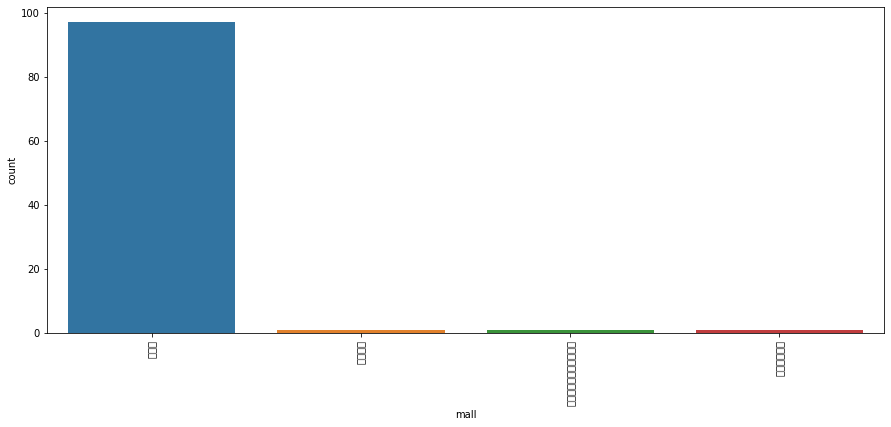

In [28]:
plt.figure(figsize=(15,6))

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

sns.countplot(
    result_mol["mall"],
    data = result_mol,
    # palette = "red",
    # font =  'NanumGothic',
    order = result_mol["mall"].value_counts().index
)

plt.xticks(rotation = 90)
plt.show()